# Poisson and Negative Binomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Count data

Poisson and Negative Binomial Regression models are suited for forecasting count data. 

Characteristics of count date:
* Non-negative Integers: OLS works best with real numbers (-635, -3, 4, 200) 
* Skewed distribution: Large number of data points for just a few values
* Sparsity: The data might have many zeros
* Rate of occurance: There is a certain rate of occurence of events $\lambda$ which may drift over time

A good strategy is to start off with a Poisson Regression and use it as a benchmark for other models.

## Poisson Process

* **Sequence of random variables:** $X_1, X_2, X_k$ each variable represents a number of occurances of some event ie. sales
* **Stochastic process:** each run will produces a different sequence of random outcomes as per some probability distribution
* **Discreet process:** number of occurences in some specified time period, which is undoublty integer
* **Independednt increments:** the number of occurances in a given time period or independent of any number of occurences in any other period
* **Identical distribution:** all $X_1, X_2, X_k$ originate from the same Poisson distribution

  
    
    
**PDF: Probability of occurences in a unit of time**

$
P_{x}(k) = \frac{\exp(-\lambda )*(\lambda )^k}{k!}
$


**PDF: Probability of occurences in t units of time**

$
P_{x}(k) = \frac{\exp(-\lambda t)*(\lambda t)^k}{k!}
$

**$P_{x}(k)$:** probability of occurance  
**$k$:** number of events  
**$\lambda$:** average occurance of events per unit time  
**$t$:** units of time

### Probability Mass Function of occurences in a unit of time for various $\lambda$

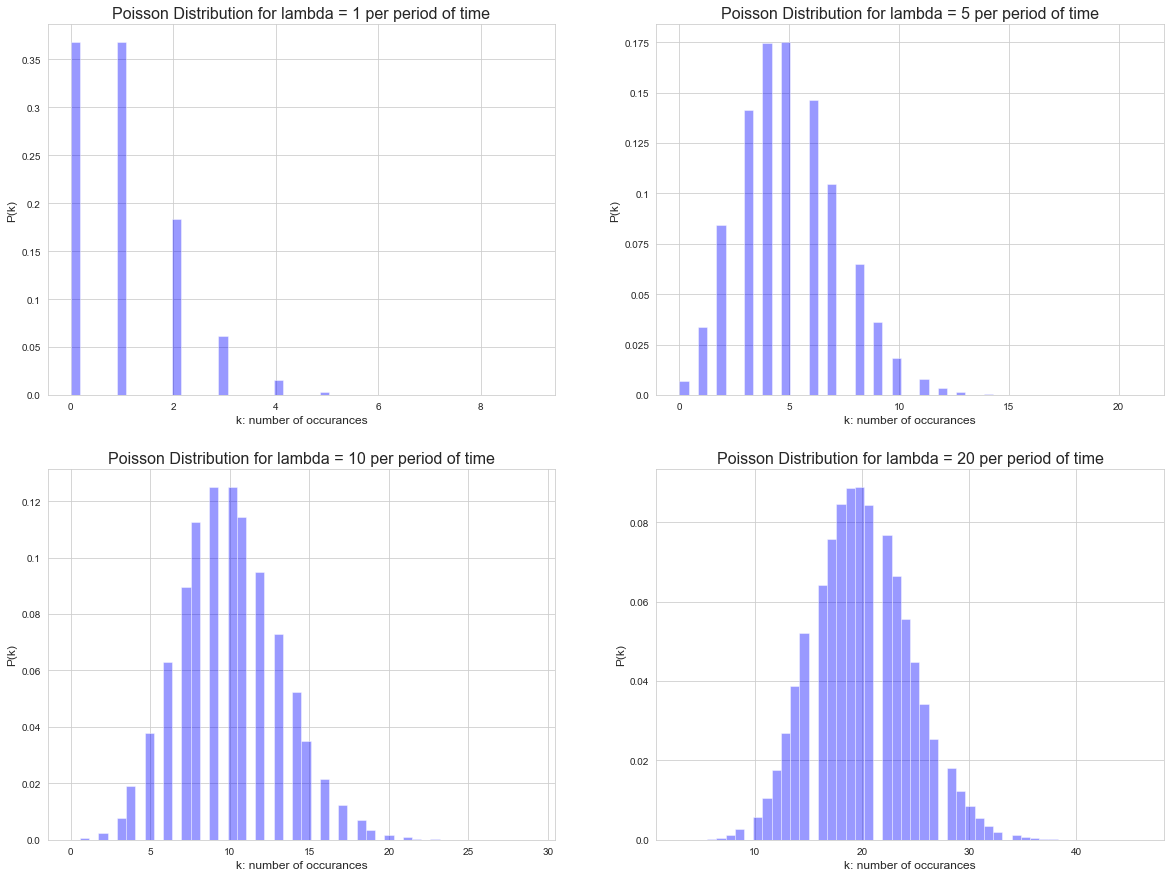

In [36]:
sample_size = 1000000

fig = plt.figure(figsize=(20,15))


for i, mu in enumerate([1, 5, 10, 20]):
    poisson = np.random.poisson(lam=mu, size=sample_size)
    
    ax = fig.add_subplot(2,2,i+1)
    sns.distplot(poisson, kde=False, ax=ax, color='Blue')
    ax.set_title(
        f"Poisson Distribution for lambda = {mu} per period of time",
        fontsize=16
    )
    ax.set_ylabel("P(k)", fontsize=12)
    ax.set_xlabel("k: number of occurances", fontsize=12)
    yticklabels = [int(i)/sample_size for i in ax.get_yticks()]
    ax.set_yticklabels(yticklabels)

### Probability Mass Function of occurences in t units of time for $\lambda=20$

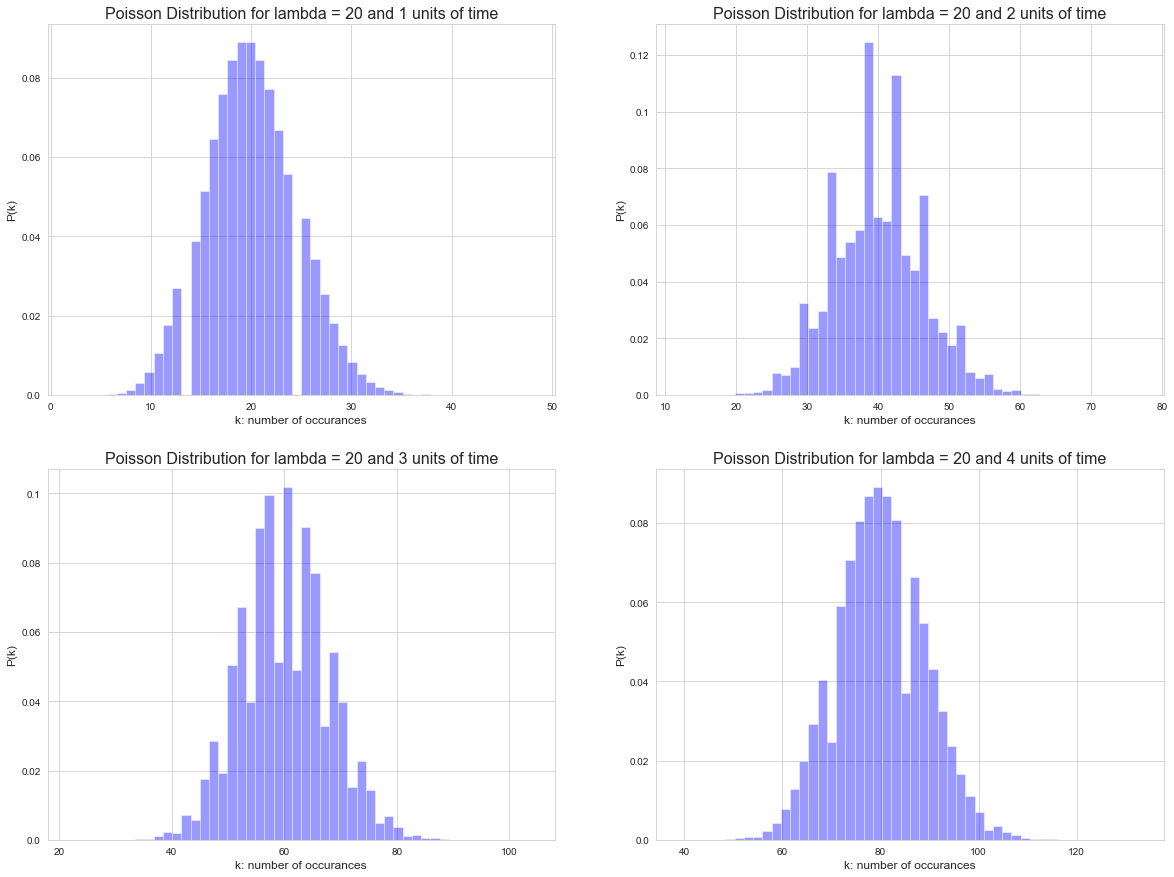

In [41]:
sample_size = 10000000
mu = 20

fig = plt.figure(figsize=(20,15))


for i, t in enumerate([1, 2, 3, 4]):
    poisson = np.random.poisson(lam=mu*t, size=sample_size)
    
    ax = fig.add_subplot(2,2,i+1)
    sns.distplot(poisson, kde=False, ax=ax, color='Blue')
    ax.set_title(
        f"Poisson Distribution for lambda = 20 and {t} units of time",
        fontsize=16
    )
    ax.set_ylabel("P(k)", fontsize=12)
    ax.set_xlabel("k: number of occurances", fontsize=12)
    yticklabels = [int(i)/sample_size for i in ax.get_yticks()]
    ax.set_yticklabels(yticklabels)

### Modelling inter-arrival times

Even though the number of occurence of evetns can be modeled using a discrete Poisson distribution, the interval between consecutive events can be modeled using an Exponential distribution.
  
Let $X1, X2, X3,..$ be random variables such that:  

$X1$: interval of time between start of process and first arrival  
$X2$: interval of time between first arrival and second arrival  
...

**PDF: Probability of inter-arrival t $(k-1)$ and $k$ arrival**  

$
P_{x}(t) = \lambda*\exp(-\lambda t)
$

**CDF: Probability of inter-arrival t $(k-1)$ and $k$ arrival is less than or equal to some value t**  

$
P_{x}(X<=t) = \int_0^t \lambda*\exp(-\lambda t) = 1 - \exp(-\lambda t)
$

**The above CDF $F_x$ allows us to generate inter-arrival times in a Poisson process. The algorithm we follow is Inverse Transform sampling for continuous distributions.**

1. Generate $U$~$Unif(0,1)$
2. Let $X = F^-1_x(U)$

**Inverse function fo the CDF of inter-arrival times is:**   
  
$
F^-1_x(t)=-\frac{\ln(1-t)}{\lambda}
$

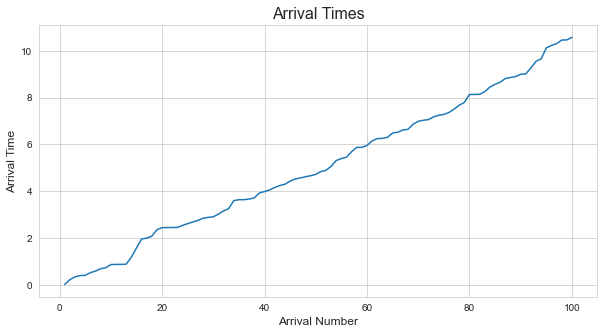

In [70]:
number_arrivals = 100
poisson_lambda = 10
arrival_time = 0
arrival_number = 0
arrival_times = []
arrivals = []

for i in range(number_arrivals):
    #Generate probability from Uniform(0,1)
    p = np.random.random()
    
    #Generate inter-arrival t from inverse of CDF of the Exponential(possion_lambda)
    inter_arrival_time = -np.log(1.0-p)/ poisson_lambda
    
    #Add inter_arrival_time to running sum of arrival time
    arrival_time += inter_arrival_time
    arrival_times.append(arrival_time)
    arrival_number += 1
    arrivals.append(arrival_number)
    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

sns.lineplot(x=arrivals, y=arrival_times, ax=ax)
ax.set_title('Arrival Times', fontsize=16)
ax.set_xlabel('Arrival Number', fontsize=12)
ax.set_ylabel('Arrival Time', fontsize=12)

plt.show()